## Prediksi Harga Property
__Linear Regression__

Referensi pembelajaran: 
- https://www.youtube.com/watch?v=N0jbX_yL5iA
- https://medium.com/@adiptamartulandi/memprediksi-harga-rumah-dengan-machine-learning-multivariate-linear-regression-ucupstory-6f0bac830077


Dataset: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah



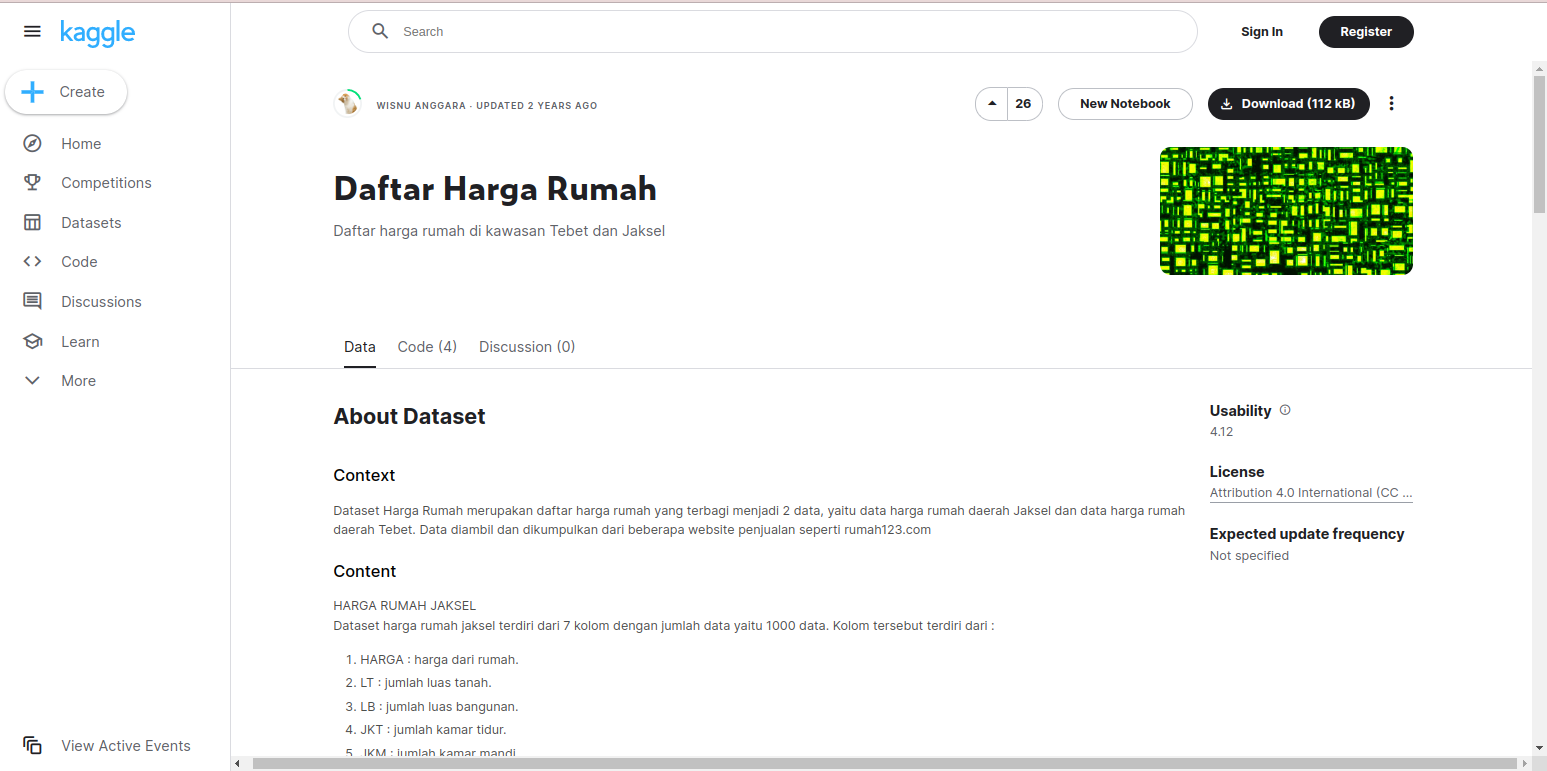

## Persiapan
__Mengimport library yang dibutuhkan__

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

__Me-load dataset & menyesuaikan kolom yang ada__

Terdapat beberapa atribut yang dapat kita analisis yaitu:
- luas_bangunan
- luas_tanah
- jumlah_kamar_tidur
- jumlah_kamar_mandi
- kapasitas_mobil_dalam_garasi


In [315]:
df = pd.read_csv('./data_rumah.csv')
# # menambahkan kolom harga_jt untuk memudahkan dalam visualisasi data
# df['harga_jt'] = df['harga'] // 1000000
df.head()

,no,nama_rumah,harga,luas_bangunan,luas_tanah,jumlah_kamar_tidur,jumlah_kamar_mandi,kapasitas_mobil_dalam_garasi
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


---

## Melakukan Analisis Dataset

__Melakukan check apakah ada data yang kosong__

> Dari dataset tidak ditemukan data yang kosong

In [316]:
df.isnull().sum()

no                              0
nama_rumah                      0
harga                           0
luas_bangunan                   0
luas_tanah                      0
jumlah_kamar_tidur              0
jumlah_kamar_mandi              0
kapasitas_mobil_dalam_garasi    0
dtype: int64

__Analisis Attribut Luas Bangunan__

> Diketahui bahwa populasi data mayoritas memiliki `luas_bangunan` berada pada kisaran __100 s/d 500__ dengan median berada pada angka 200
>
> Kemudian kita lihat dari diagram __box plot__, banyak terjadi __data extreme__ di angka __700__ ke atas
>
> Dari diagram __scatter plot__ juga kita bisa melihat bahwa terjadi kejanggalan pada data yang memiliki `luas_bangunan` __300 s/d 400__ namun memiliki harga diatas __50 milyar__

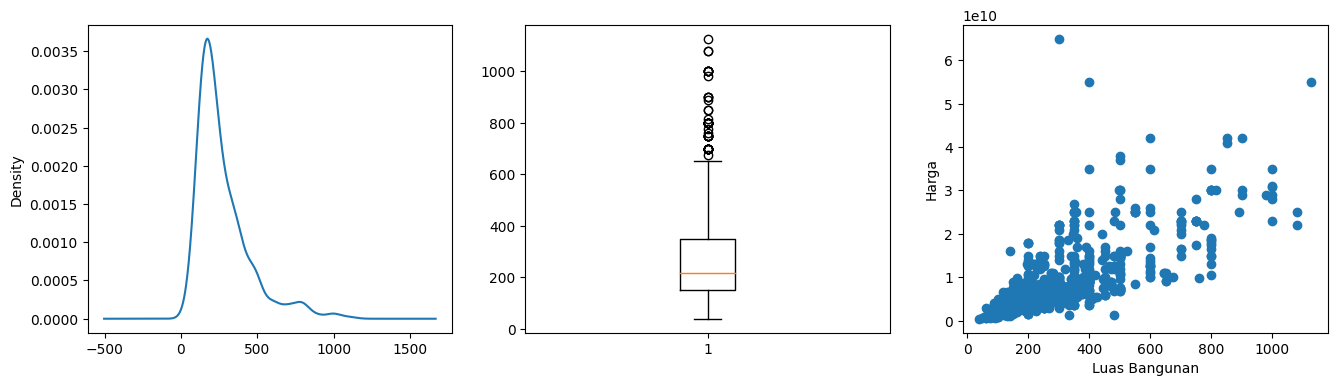

In [317]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,3,1)
#sns.countplot(x=df['luas_bangunan'])
df['luas_bangunan'].plot(kind="kde")

f.add_subplot(1,3,2)
plt.boxplot(df['luas_bangunan'])

f.add_subplot(1,3,3)
plt.scatter( df['luas_bangunan'], df['harga'])
plt.ylabel("Harga")
plt.xlabel("Luas Bangunan")

plt.show()

__Analisis Attribut Luas Tanah__

> Hampir sama seperti atribut `luas_bangunan` populasi data mayoritas memiliki `luas_tanah` berada pada kisaran __100 s/d 500__ dengan median berada pada angka 200
>
> Kemudian kita lihat dari diagram __box plot__, banyak __data extreme__ di angka __600__ ke atas
>
> Dari diagram __scatter plot__ juga kita bisa melihat bahwa terjadi kejanggalan pada data yang memiliki `luas_tanah` dengan kisaran __250__ namun memiliki harga diatas __60 milyar__

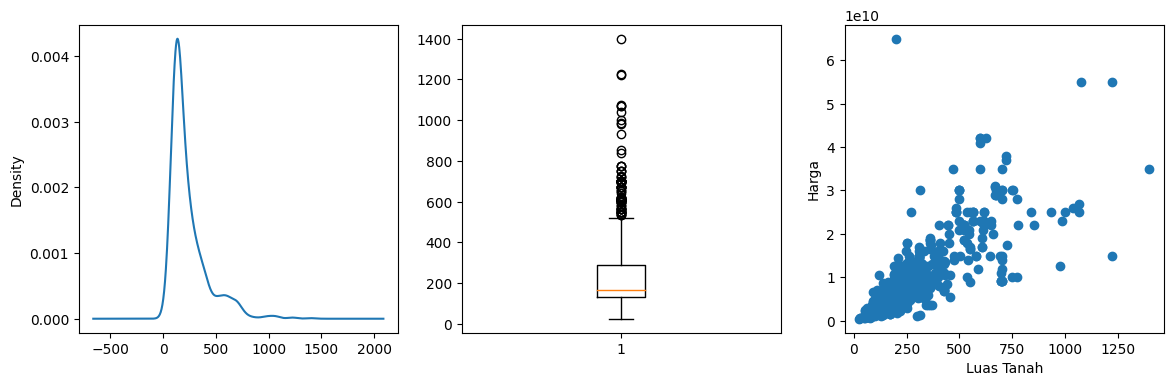

In [318]:
f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
# sns.countplot(x=df['luas_tanah'])
df['luas_tanah'].plot(kind='kde')

f.add_subplot(1,3,2)
plt.boxplot(df['luas_tanah'])

f.add_subplot(1,3,3)
plt.scatter(df['luas_tanah'], df['harga'])
plt.ylabel("Harga")
plt.xlabel("Luas Tanah")

plt.show()

__Analisis Attribut Jumlah Kamar Tidur__

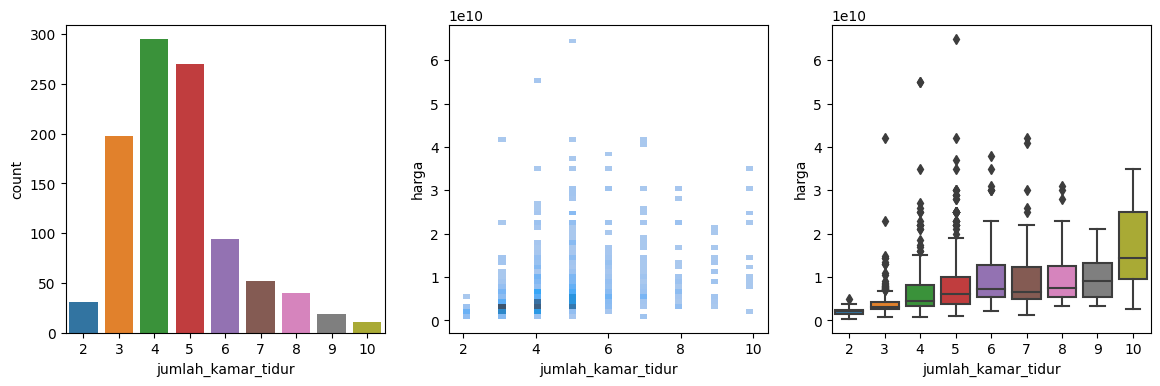

In [346]:
# f = plt.figure(figsize=(12,4))
# f.add_subplot(1,2,1)
# sns.countplot(x=df['jumlah_kamar_tidur'])

# f.add_subplot(1,2,2)
# plt.boxplot(df['jumlah_kamar_tidur'])

# plt.show()

#=====================================

f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
sns.countplot(x=df['jumlah_kamar_tidur'])

f.add_subplot(1,3,2)
# plt.boxplot(df['jumlah_kamar_tidur'])
sns.histplot(x=df['jumlah_kamar_tidur'], y=df['harga'])

f.add_subplot(1,3,3)
boxplot_kamartidur = sns.boxplot(x=df['jumlah_kamar_tidur'], y=df['harga'])
# sns.histplot(x=df['jumlah_kamar_tidur'], y=df['harga'])

plt.show()

__Analisis Attribut Jumlah Kamar Mandi__

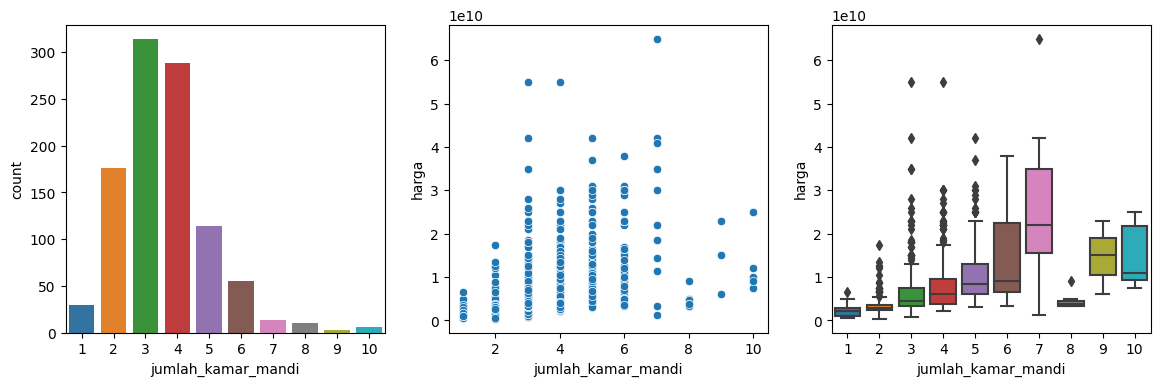

In [320]:
# f = plt.figure(figsize=(12,4))
# f.add_subplot(1,2,1)
# sns.countplot(x=df['jumlah_kamar_mandi'])

# f.add_subplot(1,2,2)
# plt.boxplot(df['jumlah_kamar_mandi'])

# plt.show()

#=====================================

f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
sns.countplot(x=df['jumlah_kamar_mandi'])

f.add_subplot(1,3,2)
sns.scatterplot(x=df['jumlah_kamar_mandi'], y=df['harga'])

f.add_subplot(1,3,3)
sns.boxplot(x=df['jumlah_kamar_mandi'], y=df['harga'])

plt.show()

__Analisis Attribut Kapasitas Garasi__

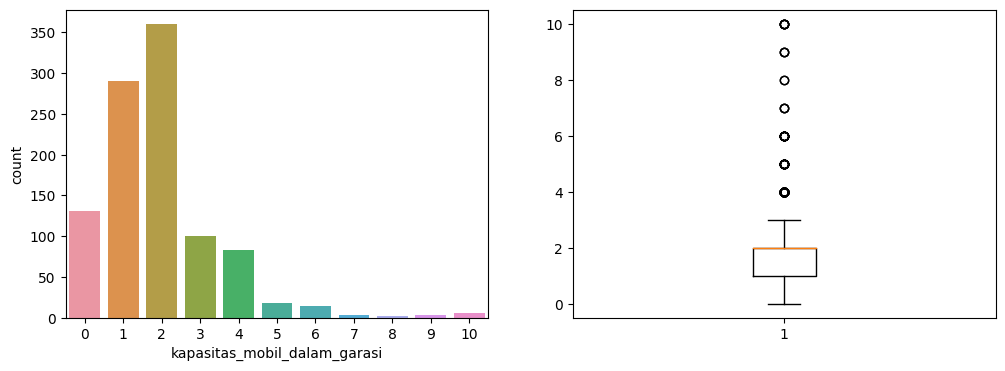

In [321]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(x=df['kapasitas_mobil_dalam_garasi'])

f.add_subplot(1,2,2)
plt.boxplot(df['kapasitas_mobil_dalam_garasi'])
plt.show()

___

## Data Cleansing

__Pair plot untuk melihat relasi antara variabel2 X terhadap variable Y__

variabel X adalah `harga`

variabel Y adalah 
- `luas_bangunan`
- `luas_tanah`
- `jumlah_kamar_tidur`
- `jumlah_kamar_mandi`
- `kapasitas_mobil_dalam_garasi`

<Figure size 1000x800 with 0 Axes>

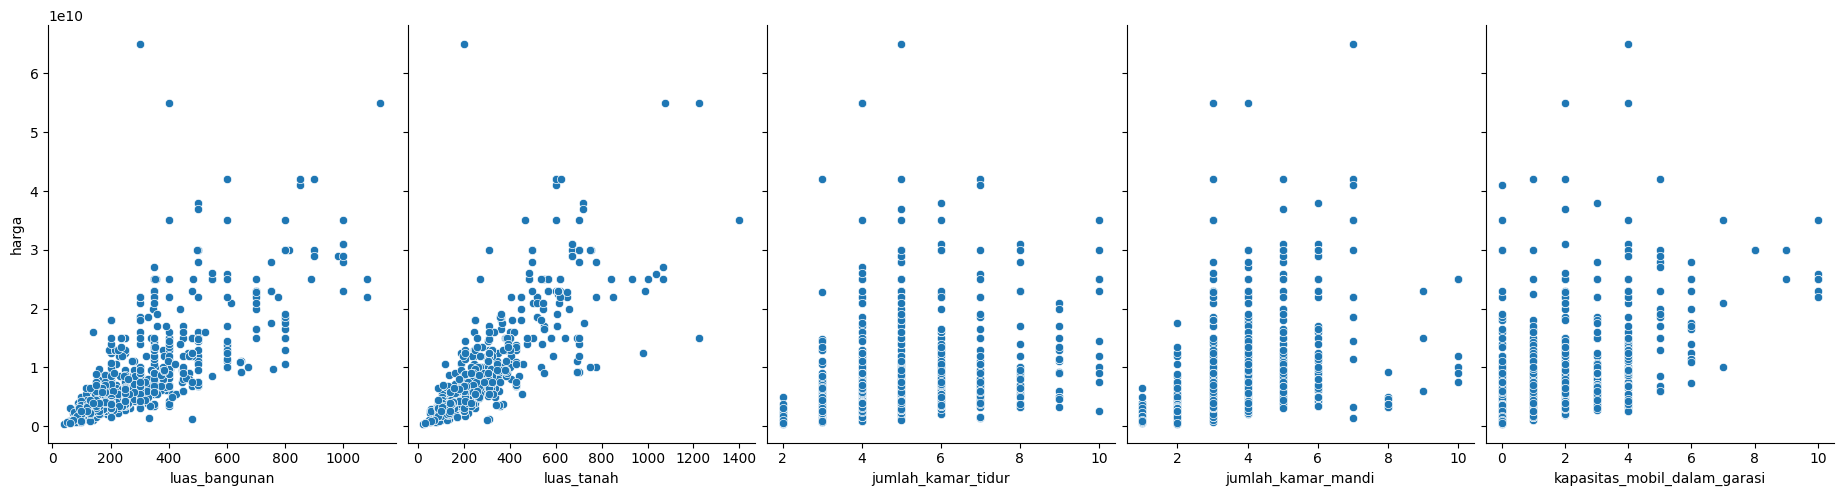

In [322]:
plt.figure(figsize=(10,8))
sns.pairplot(
	data=df,
	x_vars=['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi'],
	y_vars=['harga'],
	height=5,
	aspect=0.75,
	# kind='hist'
)

In [323]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable. (diketahui luas_tanah & luas_bangunan mempunyai hubungan linear positif yang sangat kuat)
df2 = df[['harga', 'luas_bangunan', 'luas_tanah', 'jumlah_kamar_mandi', 'jumlah_kamar_tidur', 'kapasitas_mobil_dalam_garasi']]
df2.corr().style.format(precision=3).background_gradient()

,harga,luas_bangunan,luas_tanah,jumlah_kamar_mandi,jumlah_kamar_tidur,kapasitas_mobil_dalam_garasi
harga,1.000,0.747,0.810,0.405,0.323,0.485
luas_bangunan,0.747,1.000,0.740,0.530,0.444,0.492
luas_tanah,0.810,0.740,1.000,0.389,0.425,0.484
jumlah_kamar_mandi,0.405,0.530,0.389,1.000,0.669,0.345
jumlah_kamar_tidur,0.323,0.444,0.425,0.669,1.000,0.280
kapasitas_mobil_dalam_garasi,0.485,0.492,0.484,0.345,0.280,1.000


In [371]:
df_cleansing = df.copy()

# cleaning outlier luas_bangunan
df_cleansing = df_cleansing.loc[~((df_cleansing['harga'] > 50 * 10**9) & (df_cleansing['luas_bangunan'] < 450))]
# df_cleansing = df_cleansing.loc[~(df_cleansing['luas_bangunan'] > 700)]

# cleaning outlier luas_tanah
df_cleansing = df_cleansing.loc[~((df_cleansing['harga'] > 50 * 10**9) & (df_cleansing['luas_tanah'] < 300))]
# df_cleansing = df_cleansing.loc[~(df_cleansing['luas_tanah'] > 600)]

# cleaning outlier jumlah_kamar_tidur
df_cleansing = df_cleansing.loc[~(df_cleansing['jumlah_kamar_tidur'] > 6)]
# df_cleansing = df_cleansing.loc[~(df_cleansing['jumlah_kamar_tidur'] < 3)]

# cleaning outlier jumlah_kamar_mandi
df_cleansing = df_cleansing.loc[~(df_cleansing['jumlah_kamar_mandi'] > 5)]

# cleaning outlier kapasitas_mobil_dalam_garasi
df_cleansing = df_cleansing.loc[~(df_cleansing['kapasitas_mobil_dalam_garasi'] > 4)]

df_fix = df_cleansing.copy()

df_cleansing.count()

no                              831
nama_rumah                      831
harga                           831
luas_bangunan                   831
luas_tanah                      831
jumlah_kamar_tidur              831
jumlah_kamar_mandi              831
kapasitas_mobil_dalam_garasi    831
dtype: int64

<Figure size 1000x800 with 0 Axes>

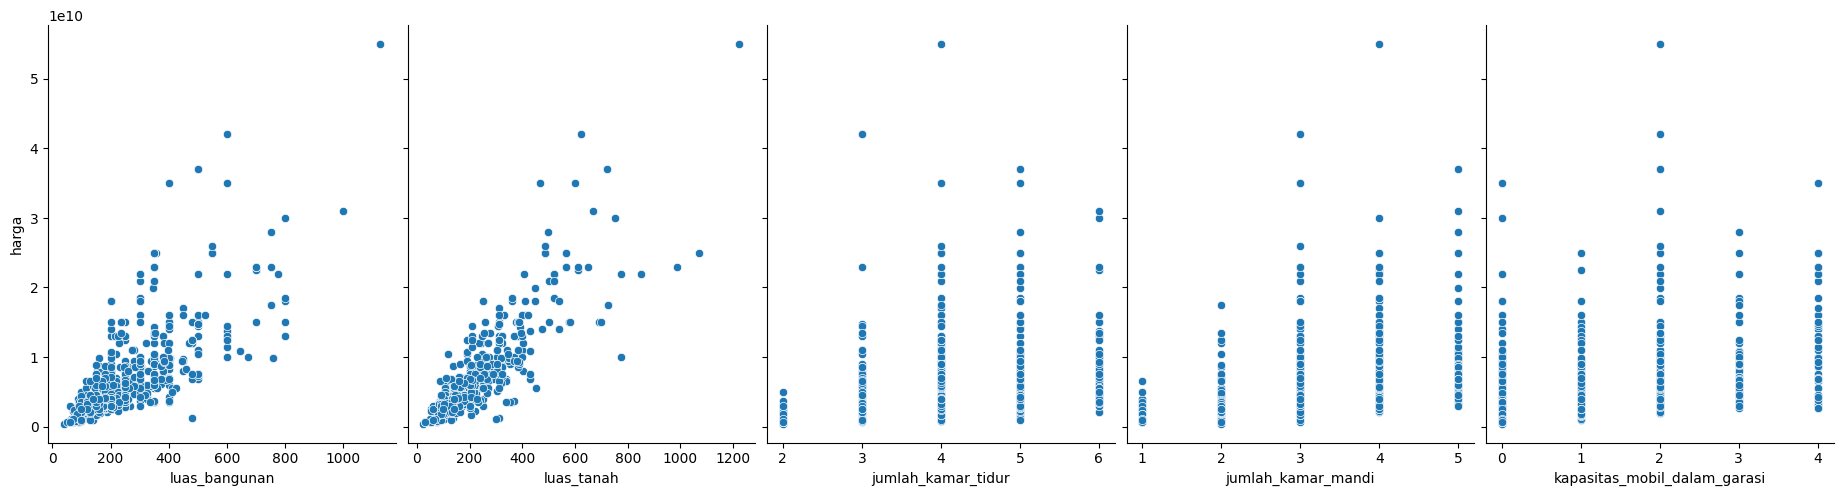

In [390]:

plt.figure(figsize=(10,8))
sns.pairplot(
	data=df_fix,
	x_vars=['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi'],
	y_vars=['harga'],
	height=5,
	aspect=0.75,
	kind='scatter',
)

In [373]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable. (diketahui luas_tanah & luas_bangunan mempunyai hubungan linear positif yang sangat kuat)
df_fix2 = df_fix[['harga', 'luas_bangunan', 'luas_tanah', 'jumlah_kamar_mandi', 'jumlah_kamar_tidur', 'kapasitas_mobil_dalam_garasi']]
df_fix2.corr().style.format(precision=3).background_gradient()

,harga,luas_bangunan,luas_tanah,jumlah_kamar_mandi,jumlah_kamar_tidur,kapasitas_mobil_dalam_garasi
harga,1.000,0.734,0.862,0.344,0.280,0.347
luas_bangunan,0.734,1.000,0.729,0.467,0.381,0.399
luas_tanah,0.862,0.729,1.000,0.274,0.323,0.318
jumlah_kamar_mandi,0.344,0.467,0.274,1.000,0.537,0.343
jumlah_kamar_tidur,0.280,0.381,0.323,0.537,1.000,0.247
kapasitas_mobil_dalam_garasi,0.347,0.399,0.318,0.343,0.247,1.000


<br>

---

<br>

## Tahap Pemodelan

In [388]:
# membuat variabel x dan y
# x = df_fix[['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi']]
# y = df_fix[['harga']]
x = df[['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi']]
y = df[['harga']]

# split data menjadi training dan testing dengan porsi 80:20
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# mebuat object linear regression
lin_reg = LinearRegression()

# train model dengan menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

# mencari tahu nilai koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)


[[ 1.35717659e+07  2.21717476e+07 -5.79419330e+08  4.12076997e+08
   3.01782364e+08]]
[-7.20401318e+08]


In [389]:
# mencari tahu skor akurasi dari model
lin_reg.score(x_test, y_test)


0.7936412125210104

In [330]:
import locale

def rupiah_format(angka, with_prefix=False, desimal=2):
    locale.setlocale(locale.LC_NUMERIC, 'id_ID.UTF-8')
    rupiah = locale.format_string("%.*f", (desimal, angka), True)
    if with_prefix:
        return "Rp. {}".format(rupiah)
    return rupiah

In [366]:
# prediksi harga rumah
result = lin_reg.predict([[50,50,2,8,0]])
# result = lin_reg.predict([[40,25,2,2,0]])
rupiah_format(int(result[0][0]),True)

/home/nabif/Projects/nusamandiri/dwbi_linear_regression/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Rp. 2.528.547.990,00'

In [367]:
result = lin_reg.predict([[1000,1000,4,3,0]])
rupiah_format(int(result[0][0]), True)

/home/nabif/Projects/nusamandiri/dwbi_linear_regression/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Rp. 35.037.331.360,00'

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

---

# ENDS HERE

---
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




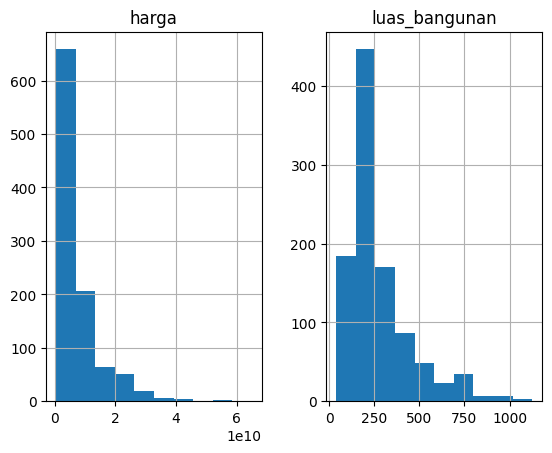

In [333]:
vis = df[['nama_rumah','harga','luas_bangunan']]
vis.hist()
plt.show()

### Visualisasi hubungan antara luas bangunan dengan harga

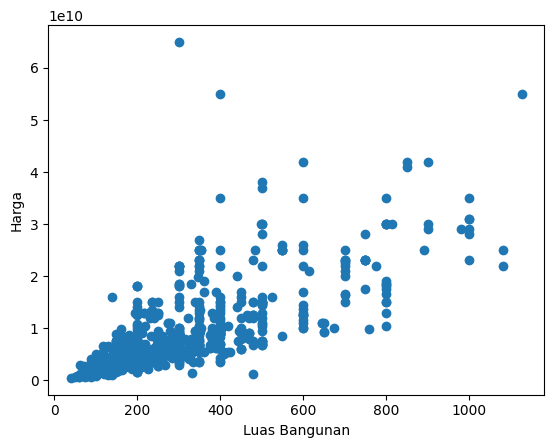

In [334]:
plt.scatter(df.luas_bangunan, df.harga)
plt.xlabel("Luas Bangunan")
plt.ylabel("Harga")
plt.show()

# New Section

## Penerapan Regresi Linear sederhana

In [335]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [336]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['luas_bangunan']])
train_y = np.asanyarray(train[['harga']])
regr.fit (train_x, train_y)
# Mencari Coeficient & Intercept
print("Coeficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coeficient:  [[30368409.38276999]]
Intercept:  [-7.58607004e+08]


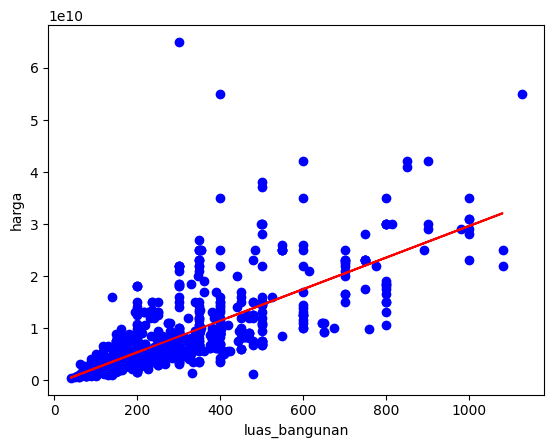

In [337]:
plt.scatter(df.luas_bangunan, df.harga, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("luas_bangunan")
plt.ylabel("harga")
plt.show()